# CAMAR 上市公司基本信息

本文介绍如何从 CAMAR 获取上市公司基本信息，包括公司名称、注册资本、成立日期、注册地址等。

- 网址：<https://data.csmar.com/>
- 登录：中大 IP 地址范围内自动登录 (机构账号)
- 子库：`首页 /数据中心 /单表查询 /公司研究系列 /上市公司基本信息`

## 基本流程

- **基本设定**：依次进行 **时间设置**、**代码设置**、**字段设置**、**条件筛选**，以确定数据的时间范围、代码范围、字段范围和数据筛选条件。
- **联表查询**：可以将其他表格数据合并到当前表格中，形成一个新的表格。
- **下载数据**：可以选择 Excel, CSV, TXT 或 Stata 格式下载数据。

### 我的一些基本设定
- 时间区间：开始时间 2000-12-31；结束时间 2024-12-31
- 代码设置：常用代码 / 全部A股
- 字段设置：全选 &rarr; 排除「董秘传真」
- 条件筛选：留空
- 联表查询：留空
- 下载数据：
  - 选择文件输出类型 `Excel2007格式 (*.xlsx) 推荐`
  - 可以填入自己的邮箱，则数据自动发至邮箱；否则会弹出一个下载页面

最终的下载页面信息如下：

![20250414120211](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250414120211.png)

解压后会得到两份文件：
- `stk_listedcoinfoanl.xlsx`: 数据文件
- `STK_LISTEDCOINFOANL[DES][xlsx].txt`: 变量说明文件

## Python 处理过程

接下来，我们在 Copolit 的提示下 (偶尔会借助 ChatGPT 或 DeepSeek) 来完成数据的导入和预处理。

为了提升表格的显示效果，我预先安装了 VScode 扩展插件：
- **Data Wrangler**

## ChatGPT 提示词

```raw
Python 数据处理：标签文件

- myFolder：D:\Github\dsfinance\case\CSMAR\data_raw
- Files:
  - myFile1: STK_LISTEDCOINFOANL.xlsx
  - myFile2：STK_LISTEDCOINFOANL[DES][xlsx].txt

- Files 的内容：

  - myFile1 的内容样式：
'''
Symbol	ShortName	EndDate	ListedCoID
股票代码	股票简称	统计截止日期	上市公司ID
没有单位	没有单位	没有单位	没有单位
000001	深发展A	2000-12-31	101704
000001	深发展A	2001-12-31	101704
''' 
    - Note: 第一行为 变量名，第二行为变量中文名，第三行为单位（没有单位则为空）。
    - 第三行的处理建议：
      - 如果单位是“没有单位”，则忽略该信息。
      - 如果单位是“万元”，则将其附加到变量中文名后，写为「变量中文名（万元）」。

  - myFile2 的内容样式：'VarName' ['变量中文名'] - '变量描述'

'''{myFile2 sample data}
Symbol [股票代码] - 上交所、深交所和北交所上市的证券代码。
ShortName [股票简称] - 上交所、深交所和北交所上市上市的股票简称。
EndDate [统计截止日期] - YYYY-MM-DD。
ListedCoID [上市公司ID] - 希施玛内部编制的上市公司ID。
SecurityID [证券ID] - 希施玛内部编制的证券ID。
'''

## 任务

### 任务 1：
导入 myFile1, 并将其转换为 DataFrame 对象，并命名为 STK_basic_inf。


### 任务 2：
写一段 Python 代码，把 [myFile2] 中的信息整理成两个字典
   字典 1 (dic_var_Cname)：'VarName' - '变量中文名'
   字典 2 (dic_var_Cnotes)：'VarName' - '变量描述'
```   

### 任务 1：导入 myFile1 并将其转换为 DataFrame 对象

首先，我们需要导入 `myFile1` 文件，并将其转换为 DataFrame 对象。以下是相应的 Python 代码实现：

In [1]:
import pandas as pd

# 读取 myFile1: STK_LISTEDCOINFOANL.xlsx
folder = r'D:\Github\dsfinance\case\CSMAR\data_raw'
filename = 'STK_LISTEDCOINFOANL.xlsx'
file_path = f"{folder}\\{filename}"

STK_basic_inf = pd.read_excel(file_path)


c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [54]:
# 提示词：查看数据框的前四列，前四行

# 查看数据框的前四列，前四行
STK_basic_inf.iloc[:4, :4]
# 如果不明白 STK_basic_inf.iloc[:4, :4] 的意思，可以使用 help 函数查看
# help(STK_basic_inf.iloc)

,Symbol,ShortName,EndDate,ListedCoID
0,股票代码,股票简称,统计截止日期,上市公司ID
1,没有单位,没有单位,没有单位,没有单位
2,000001,深发展A,2000-1...,101704
3,000001,深发展A,2001-1...,101704


In [55]:
# 提示词：删除第二行观察值 '没有单位'
STK_basic_inf = STK_basic_inf.drop(index=1).reset_index(drop=True)
STK_basic_inf.iloc[:3, :3]  # 显示前3行和前3列

,Symbol,ShortName,EndDate
0,股票代码,股票简称,统计截止日期
1,000001,深发展A,2000-1...
2,000001,深发展A,2001-1...


我们发现，第一行并不是实际的观测值，而是变量的中文介绍。我们需要将这些信息提取出来，并将其作为变量的标签。

> 提示词：把 index=0，即第一行观察值中的字符串提取出来，做成对应变量的 variable label 。以第一列为例，类似于 Stata 中的 label variable Symbol "股票代码"。最终的字典格式为：`{'Symbol': '股票代码', 'ShortName': '公司名称', ...}`。

In [56]:
# 提取第一行观察值作为 variable label
labels_list = {col: STK_basic_inf.iloc[0][col] for col in STK_basic_inf.columns}

# 创建最终的字典格式，将列名映射到对应的 variable label
variable_labels = {col: labels_list[col] for col in STK_basic_inf.columns}

# 输出最终的字典的前三个键值对
dict(list(variable_labels.items())[:3])


{'Symbol': '股票代码', 'ShortName': '股票简称', 'EndDate': '统计截止日期'}

In [ ]:
# 查看所有变量的标签
variable_labels = pd.Series(variable_labels)
#variable_labels   # 丐版
variable_labels.to_frame().style.set_properties(**{'text-align': 'left'})

,0
Symbol,股票代码
ShortName,股票简称
EndDate,统计截止日期
ListedCoID,上市公司ID
SecurityID,证券ID
IndustryName,行业名称
IndustryCode,行业代码
IndustryNameC,行业名称C
IndustryCodeC,行业代码C
IndustryNameD,行业名称D


In [60]:
# 查看特定变量的标签
variable_labels[['Symbol', 'EndDate']]

Symbol       股票代码
EndDate    统计截止日期
dtype: object

In [62]:
# 提示词：删除第一行观察值 (index=0)
STK_basic_inf = STK_basic_inf.drop(index=0).reset_index(drop=True)

# 列示处理完的数据：
STK_basic_inf.iloc[:4, :4]

,Symbol,ShortName,EndDate,ListedCoID
0,000001,深发展A,2000-1...,101704
1,000001,深发展A,2001-1...,101704
2,000001,深发展A,2002-1...,101704
3,000001,深发展A,2003-1...,101704




## 任务 2：整理 myFile2 中的信息为字典

接下来，我们将处理 `myFile2` 中的信息，并将其整理为两个字典：一个是包含变量中文名的字典，另一个是包含变量描述的字典。

首先，加载 `myFile2` 文件并进行必要的处理：


In [ ]:

# 读取 myFile2: STK_LISTEDCOINFOANL[DES][xlsx].txt
folder = r'D:\Github\dsfinance\case\CSMAR\data_raw'
filename2 = 'STK_LISTEDCOINFOANL[DES][xlsx].txt'
file_path2 = f"{folder}\\{filename2}"
# file_path2 = os.path.join(folder, filename2)  # 另一种路径拼接方式

# 加载文本文件并转换为 DataFrame
with open(file_path2, 'r', encoding='utf-8') as file:
    lines = file.readlines()

lines[:3]

['Symbol [股票代码] - 上交所、深交所和北交所上市的证券代码。\n',
 'ShortName [股票简称] - 上交所、深交所和北交所上市上市的股票简称。\n',
 'EndDate [统计截止日期] - YYYY-MM-DD。\n']

观察一下这个数据的特征，会发现，只需要根据 `' ['` 和 `'] - '` 来进行分割 (不包括两侧的单引号)，就可以得到我们需要的变量名、变量中文名和变量描述。我们可以把这个特征告诉 Copolit，来帮助我们完成数据的处理。

In [ ]:
# Initialize lists to store the split fields
# 提示词：
#       拆分 lines：根据 ' [' 和 '] - ' 这两个标记符把每一行文字拆成三个字段：
#       var_name, var_label, var_description

var_names = []
var_labels = []
var_descriptions = []

# Process each line in the lines list
for line in lines:
    if ' [' in line and '] - ' in line:
        # Extract the fields using the delimiters
        var_name = line.split(' [')[0].strip()
        var_label = line.split(' [')[1].split('] - ')[0].strip()
        var_description = line.split('] - ')[1].strip()
        # Append the extracted fields to their respective lists
        var_names.append(var_name)
        var_labels.append(var_label)
        var_descriptions.append(var_description)

# Display the first few results for verification
list(zip(var_names[:3], var_labels[:3], var_descriptions[:3]))

[('Symbol', '股票代码', '上交所、深交所和北交所上市的证券代码。'),
 ('ShortName', '股票简称', '上交所、深交所和北交所上市上市的股票简称。'),
 ('EndDate', '统计截止日期', 'YYYY-MM-DD。')]

### 制作字典

**提示词**：

```raw
?? 制作字典：
方案1：做一个字典 {var_name , var_label, var_description}。
方案2：做两个字典：dict1: {var_name, var_label}; dict2: {var_name, var_description}。
你觉得哪个方案好？
```

**回答：**

> A: 方案2更好，因为将变量名与其中文名和描述分成两个独立的字典（dict1 和 dict2）可以提高代码的可读性和灵活性。如果你只需要中文名或描述，可以直接访问对应的字典，而不需要处理额外的数据。此外，分开存储也更符合单一职责原则，便于维护和扩展。

In [74]:
# 创建字典 dic_var_label 和 dic_var_notes
dic_var_label = dict(zip(var_names, var_labels))
dic_var_notes = dict(zip(var_names, var_descriptions))

# 输出字典的前几个键值对以验证
print("dic_var_label:", dict(list(dic_var_Cname.items())[:2]))
print("dic_var_notes:", dict(list(dic_var_Cnotes.items())[:2]))

dic_var_label: {'Symbol': '股票代码', 'ShortName': '股票简称'}
dic_var_notes: {'Symbol': '上交所、深交所和北交所上市的证券代码。', 'ShortName': '上交所、深交所和北交所上市上市的股票简称。'}


## 包装成函数：CSMAR_var_label

> **提示词：**

我们将基于上述处理过程，定义一个函数 `CSMAR_var_label()`，以便于后续的调用和复用。
- input: 从 CSMAR 下载数据，解压后的 `FileName[DES][xlsx].txt` 文件
- output：两个字典：`dic_var_label` 和 `dic_var_notes`
- arguments
  - `FileName`: 文件名，如果不填写，则默认为当前工作目录下的 `*[DES][xlsx].txt` 文件。
  - `Folder(string)`: 文件路径，默认为当前工作目录
  - `encoding()`: 编码格式，默认为 `utf-8`
  - `sep`: 分隔符，默认为 `[' [', '] - ']`

In [ ]:
import os

def CSMAR_var_label(FileName=None, 
                    Folder=os.getcwd(), 
                    encoding='utf-8', 
                    sep=[' [', '] - ']):
    """
    Process the [DES][xlsx].txt file from CSMAR to extract variable labels and descriptions.

    Args:
        FileName (str): The file name of the [DES][xlsx].txt file. Defaults to None.
        Folder (str): The folder path where the file is located. Defaults to the current working directory.
        encoding (str): The encoding format of the file. Defaults to 'utf-8'.
        sep (list): The delimiters used to split the lines. Defaults to [' [', '] - '].

    Returns:
        tuple: Two dictionaries:
            - dic_var_label: A dictionary mapping variable names to their Chinese labels.
            - dic_var_notes: A dictionary mapping variable names to their descriptions.
    """
    # Determine the file path
    if FileName is None:
        # Automatically find a file ending with [DES][xlsx].txt in the folder
        files = [f for f in os.listdir(Folder) if f.endswith('[DES][xlsx].txt')]
        if not files:
            raise FileNotFoundError("No [DES][xlsx].txt file found in the specified folder.")
        FileName = files[0]
    file_path = os.path.join(Folder, FileName)

    # Read the file
    with open(file_path, 'r', encoding=encoding) as file:
        lines = file.readlines()

    # Initialize lists to store the split fields
    var_names = []
    var_labels = []
    var_descriptions = []

    # Process each line in the file
    for line in lines:
        if sep[0] in line and sep[1] in line:
            # Extract the fields using the delimiters
            var_name = line.split(sep[0])[0].strip()
            var_label = line.split(sep[0])[1].split(sep[1])[0].strip()
            var_description = line.split(sep[1])[1].strip()
            # Append the extracted fields to their respective lists
            var_names.append(var_name)
            var_labels.append(var_label)
            var_descriptions.append(var_description)

    # Create dictionaries
    dic_var_label = dict(zip(var_names, var_labels))
    dic_var_notes = dict(zip(var_names, var_descriptions))

    return dic_var_label, dic_var_notes

### 如何使用自定义函数 CSMAR_var_label()？

> **提示词 1**：我如何使用自己定义的 CSMAR_var_label() 函数？

```python
# 定义文件路径
file_path = r'D:\Github\dsfinance\case\CSMAR\data_raw\STK_LISTEDCOINFOANL[DES][xlsx].txt'

# 调用函数
dic_var_label, dic_var_notes = CSMAR_var_label(file_path)

# 查看结果
print("变量中文名字典:", list(dic_var_label.items())[:5])  # 打印前5个键值对
print("变量描述字典:", list(dic_var_notes.items())[:5])  # 打印前5个键值对
```

> **提示词 2**：我应该选择哪一种使用方式？(1) 把这个 CSMAR_var_label() 函数放在我这份 .ipynb 文档中；(2) 另存为 CSMAR_var_label.py 文档，并保存在当前工作路径下？

1. **放在 `.ipynb` 文档中**：
    - 适合临时性或一次性使用。
    - 如果你只在当前的 Jupyter Notebook 中使用这个函数，并且不需要在其他项目中复用，直接放在 `.ipynb` 文档中更方便。

2. **另存为 `CSMAR_var_label.py` 文件**：
    - 适合长期使用和复用。
    - 如果你需要在多个项目或 Notebook 中使用这个函数，保存为 `.py` 文件更好。这样可以通过 `import` 直接调用，避免重复定义代码，提高代码的可维护性和复用性。

**推荐**：如果你计划在多个地方使用，建议选择方式 (2)，将其保存为 `CSMAR_var_label.py` 文件，并保存在当前工作路径下。

### 我的选择

由于我还有多个数据文件需要处理，所以我选择了将函数保存为 `CSMAR_var_label.py` 文件，并保存在当前工作路径下。



## 读入数据文件

基本处理思路如下：
1. 使用 `pandas` 库来读取数据文件 `STK_LISTEDCOINFOANL.xlsx`，并将其转换为 DataFrame 对象 `STK_LISTEDCOINFOANL`。完成处理后，我们会根据处理过程定义一个函数 `CSMAR_read_data()`，以便于后续的调用和复用。
2. 调用 `CSMAR_var_label()` 函数，得到两个字典：`dic_var_label` 和 `dic_var_notes`
3. 将第 2 步返回的 `dic_var_label` 和 `dic_var_notes` 作为参数附加到第 1 步得到的数据框 `STK_LISTEDCOINFOANL` 中，得到最终的 DataFrame 对象 `STK_basic_inf`。

当然，我们也可以进一步将 `CSMAR_var_label()` 函数和 `CSMAR_read_data()` 函数结合起来，形成一个更通用的函数 `read_CSMAR_data()`。使用时，只需要指定数据文件所在路径，或指定 `FileName.xlsx` 和 `FileName[DES][xlsx].txt` 这两份文件中的关键字段 **FileName** 即可。

再进一步，可以定义一个更通用的函数 `read_CSMAR()`：用户只需指定存储数据的 **Folder**，程序会自动循环调用 `read_CSMAR_data()` 函数，将每一对 `FileName_i.xlsx` 和 `FileName_i[DES][xlsx].txt` 文件都转换为数据框 **FileName_i**。


根据上述思路，最终的 `read_CSMAR()` 函数的选项如下：
- `Folder = 'string'`：数据文件所在的文件夹路径，默认值为 `getcwd()`。
- `FileName = 'string'`：数据文件的名称，默认值为 `None`。如果不填，则自动循环读取文件夹中的所有文件。
- `FileType = 'xlsx'`：数据文件的类型，默认值为 `xlsx`。其它选项包括 (此时，需要酌情修改 `read_CSMAR_data()` 函数)：
  - `csv`：逗号分隔值文件
  - `txt`：制表符分隔值文件
- `df_name = 'string' 或 list`：数据框的名称，默认值为 `None`。如果设定为 list，则按照先后顺序与文件中的 **.xlsx** 文件对应。令 len_list = wordof(list)，len_fn = wordof(fileNames)，若 `len_list<len_fn`，则前  len_list 个文件名的数据框名称，其它的采用 fileName 作为数据框的名称。


## 新的数据处理流程
1. 读入「变量-标签」文件：`STK_LISTEDCOINFOANL[DES][xlsx].txt`
2. 调用 `CSMAR_var_label()` 函数，得到两个字典：`dic_var_label` 和 `dic_var_notes`
3. 读入「数据文件」：`STK_LISTEDCOINFOANL.xlsx`
4. 将 `dic_var_label` 和 `dic_var_notes` 作为参数传入 `CSMAR_basic_inf()` 函数，得到最终的 DataFrame 对象 `STK_basic_inf`。

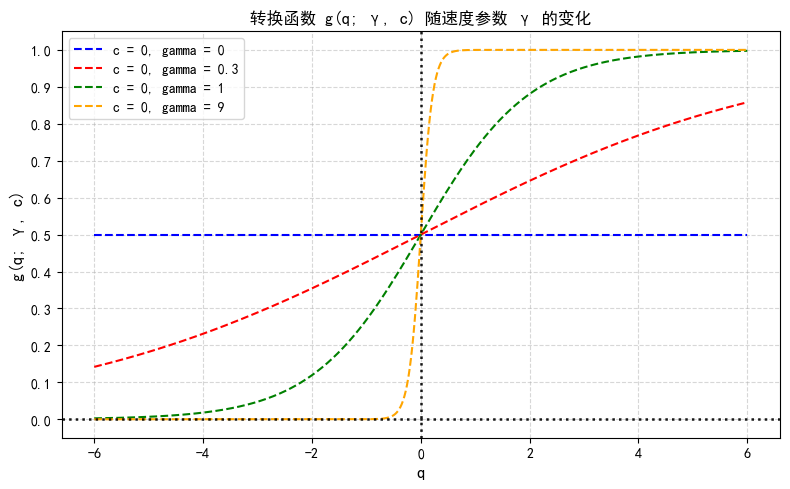

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 设置支持中文的字体，例如 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Define parameters
c = 0
gamma_values = [0, 0.3, 1, 9]  # gamma values
x = np.linspace(-6, 6, 500)  # x-axis range

# Define the sigmoid function
def sigmoid(x, gamma, c):
    return (1 + np.exp(-gamma * (x - c))) ** -1

# Plot the functions for different gamma values
plt.figure(figsize=(8, 5))
colors = ['blue', 'red', 'green', 'orange']  # Colors for each gamma
labels = [f"c = {c}, gamma = {gamma}" for gamma in gamma_values]

for gamma, color, label in zip(gamma_values, colors, labels):
    y = sigmoid(x, gamma, c)
    plt.plot(x, y, label=label, color=color, linestyle='--')  # Dashed line for functions

# Add horizontal and vertical lines
plt.axhline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # Vertical line at x=0

# Add labels, title, and legend
plt.title("转换函数 g(q; γ, c) 随速度参数 γ 的变化", fontsize=12)
plt.xlabel("q", fontsize=12)
plt.ylabel("g(q; γ, c)", fontsize=12)
plt.xticks(np.arange(-6, 7, 2))  # Custom x-axis ticks
plt.yticks(np.arange(0, 1.1, 0.1))  # Custom y-axis ticks
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better visualization

# Show the plot
plt.tight_layout()
plt.show()


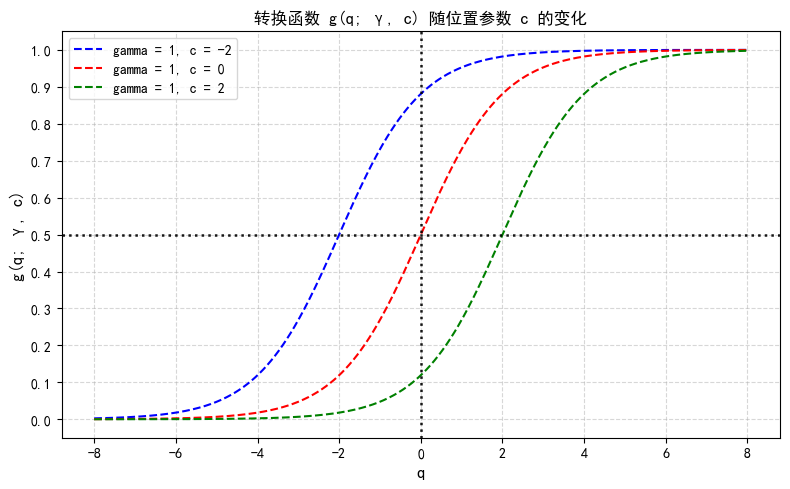

In [89]:
import numpy as np
from matplotlib import rcParams

import matplotlib.pyplot as plt

# 设置支持中文的字体，例如 SimHei（黑体）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义参数
gamma = 1
c_values = [-2, 0, 2]  # c 的不同取值
x = np.linspace(-8, 8, 500)  # x 轴范围

# 定义 sigmoid 函数
def sigmoid(x, gamma, c):
    return (1 + np.exp(-gamma * (x - c))) ** -1

# 绘制不同 c 值的曲线
plt.figure(figsize=(8, 5))
colors = ['blue', 'red', 'green']  # 每个 c 值对应的颜色
labels = [f"gamma = {gamma}, c = {c}" for c in c_values]

for c, color, label in zip(c_values, colors, labels):
    y = sigmoid(x, gamma, c)
    plt.plot(x, y, label=label, color=color, linestyle='--')  # 使用虚线绘制曲线

# 添加水平线和垂直线
plt.axhline(0.5, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # 水平线 y=0.5
plt.axvline(0, color='black', linestyle=':', linewidth=1.8, alpha=0.9)  # 垂直线 x=0

# 添加标题、标签和图例
plt.title("转换函数 g(q; γ, c) 随位置参数 c 的变化", fontsize=12)
plt.xlabel("q", fontsize=12)
plt.ylabel("g(q; γ, c)", fontsize=12)
plt.xticks(np.arange(-8, 9, 2))  # 自定义 x 轴刻度
plt.yticks(np.arange(0, 1.1, 0.1))  # 自定义 y 轴刻度
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线

# 显示图形
plt.tight_layout()
plt.show()

# PSTR

本文介绍面板平滑转换模型 (PSTR) 的基本概念、模型设定、估计和检验方法，并通过 Python 实现 PSTR 模型的估计和检验。

## 模型设定

PSTR 模型的基本形式如下：

$$
y_{it} = \alpha_i + \beta_0 x_{it} + \beta_1 x_{it} g(q_{it}; \gamma, c) + \epsilon_{it}
$$

其中，$y_{it}$ 是被解释变量，$x_{it}$ 是解释变量，$g(q_{it}; \gamma, c)$ 是平滑转换函数，$\alpha_i$ 是个体效应，$\beta_0$ 和 $\beta_1$ 是参数，$\epsilon_{it}$ 是误差项。

平滑转换函数的设定如下：
$$
g(q_{it}; \gamma, c) = \frac{1}{1 + e^{-\gamma (q_{it} - c)}}
$$
其中，$q_{it}$ 是平滑转换变量，$\gamma$ 是平滑参数 (转换速度)，$c$ 是转换点。

下通过一些简单的模拟分析来说明 $\gamma$ 和 $c$ 的含义和作用。



## 参考文献：
- Gonzalo, J., & Pitarakis, J. (2006). Estimation and inference in smooth transition models. Journal of Econometrics, 135(1), 107-130.
- 

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# 定义平滑转换函数（逻辑函数）
def smooth_transition(x, gamma, c):
    return 1 / (1 + np.exp(-gamma * (x - c)))

# 定义平滑转换模型
def panel_smooth_transition_model(params, X, Y, Z):
    beta1, beta2, gamma, c = params
    transition = smooth_transition(Z, gamma, c)
    y_pred = beta1 * X + beta2 * X * transition
    return np.sum((Y - y_pred) ** 2)  # 最小化残差平方和

# 示例数据，加入个体固定效应和时间固定效应
np.random.seed(42)
N, T = 100, 10  # 面板数据的个体数和时间点
individual_effects = np.random.normal(0, 0.5, N)  # 个体固定效应
time_effects = np.random.normal(0, 0.2, T)  # 时间固定效应

X = np.random.rand(N * T)
Z = np.random.rand(N * T)

# 构造 Y，加入个体固定效应和时间固定效应
Y = (
    2 * X
    + 3 * X * smooth_transition(Z, 5, 0.5)
    + np.repeat(individual_effects, T)
    + np.tile(time_effects, N)
    + np.random.normal(0, 0.1, N * T)
)

# 初始参数
initial_params = [1, 1, 1, 0.5]

# 优化
result = minimize(panel_smooth_transition_model, initial_params, args=(X, Y, Z), method='L-BFGS-B')
beta1, beta2, gamma, c = result.x

print(f"Estimated parameters: beta1={beta1}, beta2={beta2}, gamma={gamma}, c={c}")

Estimated parameters: beta1=1.9821785851828573, beta2=3.0285019244192566, gamma=4.886915582203641, c=0.49800786495800237
